<a href="https://colab.research.google.com/github/zainmorshed/ComputerVision_bbox/blob/main/Zain_Morshed_Handwritten_Digits_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook I will explore the MNIST dataset to classify handwritten digits into the correct digits class that they belong to. This dataset consists of a collection of 28x28 grayscale images of handwritten digits (0 through 9) along with their corresponding labels. Each image is a single-channel (grayscale) image with pixel values representing the intensity of the pixels. We wil use this dataset to train and test a machine learning model with the goal of recognizing handwritten digits and correctly identifying the number that is written.

In [ ]:
#Import libraries
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#Load digits dataset from keras into the x and y variables
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
len(X_train)

60000

There are 60,000 training images (samples)

In [ ]:
len(X_test)

10000

There are 10,000 test images (samples)

In [ ]:
#Each sample if 28x28 pixel image
X_train[0].shape

(28, 28)

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

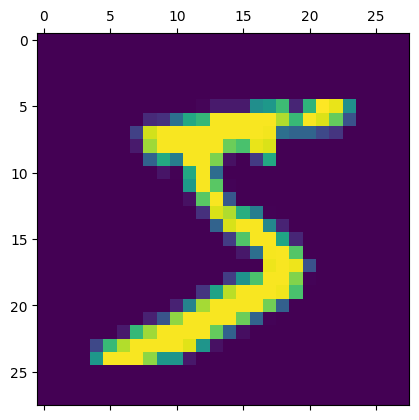

In [ ]:
plt.matshow(X_train[0])

In [ ]:
y_train[0]

5

In [ ]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
#Scaling values between 0 and 1 - this will allow us to improve our accuracy
X_train = X_train/255
X_test = X_test/255

In [ ]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
#Let's flatten the 2D array into a 1D array in order to feed it into the input of our neural network. We can do this by reshaping the dataset.

X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

print(X_train_flattened.shape)
print(X_test_flattened.shape)

(60000, 784)
(10000, 784)


In [ ]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
#Let's create a neural network. We will have 10 output neurons which classifys the digits from 0-9. We'll use a input shape of 784, representing 784 nodes that comes from the flattened array (28x28)
#We will use sigmoid as our activation function (σ(x)= 1/(1+e^-x)) in order to model the probability that a given input digit belongs to a certain class of digits
#Let's use the 'adam' optimizer to update the weights of the neural network during the training process
#We will use the 'sparse_categorical_crossentropy' loss function for multi-class classification
#We will use accuracy as our metric to determine the proportion of correclty predicted digits - simple yet effective
#fit the data using the training values and set epochs to 5(iterations over the entire training dataset)
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation = 'sigmoid')
])

model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8131 - loss: 0.7213
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9127 - loss: 0.3112
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9202 - loss: 0.2816
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9252 - loss: 0.2701
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9261 - loss: 0.2596


In [ ]:
#Now we can evaluate to see how well our model performed
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9170 - loss: 0.3025


[0.26864346861839294, 0.9258000254631042]

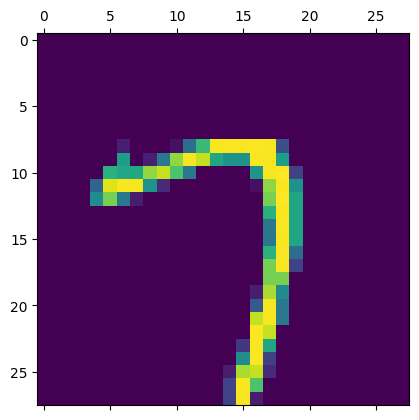

In [ ]:
plt.matshow(X_test[26])

In [ ]:
y_predicted = model.predict(X_test_flattened)
y_predicted[26]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([3.6543941e-03, 1.1609782e-06, 2.0662146e-02, 3.6259346e-02,
       6.8628049e-07, 7.7306502e-04, 1.4746922e-10, 9.9999964e-01,
       2.4624680e-07, 3.6164823e-01], dtype=float32)

In [ ]:
np.argmax(y_predicted[26])

7

In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [ ]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [ ]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    0,    2,    0,    6,    6,    3,    2,    1],
       [   0, 1112,    3,    2,    0,    1,    4,    2,   11,    0],
       [   8,    9,  907,   19,    8,    5,   13,   12,   46,    5],
       [   1,    0,   13,  927,    0,   22,    2,   11,   25,    9],
       [   1,    1,    2,    2,  908,    0,   13,    5,    9,   41],
       [   8,    3,    2,   31,   10,  776,   14,    7,   35,    6],
       [  10,    3,    4,    1,    7,   13,  914,    2,    4,    0],
       [   1,    5,   20,    7,    5,    0,    0,  963,    3,   24],
       [   6,    8,    6,   19,    9,   22,    8,   13,  874,    9],
       [  11,    7,    1,   10,   26,    7,    0,   26,    4,  917]],
      dtype=int32)>

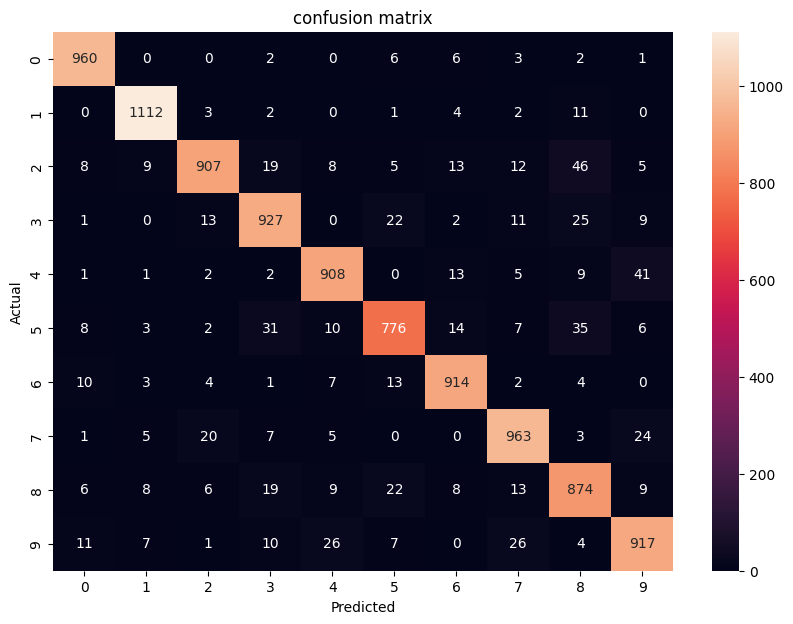

In [ ]:
#Let's visualize the accuracy of our predictions using a confusion matrix
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('confusion matrix')
plt.show()

As we can see from the confusion matrix, a lot of the values that we have predicted, correctly corresponds to their actual values as seen by the orange diagonal line. In each box we see large numbers deonting the correct predictions. The black boxes are the values that we have incorrectly predicted. As we can the model performed relatively well, however there are still some boxes with larger numbers. Let's try to improve our predictions by making some changes to the model.

In [ ]:
#Adding hidden layer to improve performance
#Let's use 100 neurons in the hidden layer
#We can use the relu activation function (f(x)=max(0,x)) in our hidden layer
#Let's train using epochs = 10. This increases the iterations over the dataset leading to better performance. We can see that this is perfect, as with each iteration we are seeing an improvement in the accuracy, without overfitting.
#Keep everything else the same

model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=10)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8733 - loss: 0.4469
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9601 - loss: 0.1344
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9726 - loss: 0.0909
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9789 - loss: 0.0702
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9847 - loss: 0.0506
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9877 - loss: 0.0411
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9897 - loss: 0.0339
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9920 - loss: 0.0273
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9936 - loss: 0.0215
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9955 - loss: 0.0172


In [ ]:
#Let's evaluate our model based on the changes we've made
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9753 - loss: 0.0899


[0.08005055785179138, 0.9778000116348267]

The accuracy of our model has improved from 0.9252 to 0.9770. Our accuracy is nearly perfect!

In [ ]:
code = """
# Import libraries
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

# Load digits dataset from keras into the x and y variables
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Each sample is a 28x28 pixel image
X_train[0].shape
X_train[0]
plt.matshow(X_train[0])
y_train[0]
y_train[:5]
X_train.shape

# Scaling values between 0 and 1 - this will allow us to improve our accuracy
X_train = X_train / 255
X_test = X_test / 255
X_train[0]

# Let's flatten the 2D array into a 1D array in order to feed it into the input of our neural network. We can do this by reshaping the dataset.
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

print(X_train_flattened.shape)
print(X_test_flattened.shape)
X_train_flattened[0]

# Let's create a neural network. We will have 10 output neurons which classify the digits from 0-9. We'll use an input shape of 784, representing 784 nodes that come from the flattened array (28x28)
# We will use sigmoid as our activation function (σ(x)= 1/(1+e^-x)) in order to model the probability that a given input digit belongs to a certain class of digits
# Let's use the 'adam' optimizer to update the weights of the neural network during the training process
# We will use the 'sparse_categorical_crossentropy' loss function for multi-class classification
# We will use accuracy as our metric to determine the proportion of correctly predicted digits - simple yet effective
# Fit the data using the training values and set epochs to 5 (iterations over the entire training dataset)
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

# Now we can evaluate to see how well our model performed
model.evaluate(X_test_flattened, y_test)
plt.matshow(X_test[26])
y_predicted = model.predict(X_test_flattened)
y_predicted[26]
np.argmax(y_predicted[26])
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]
y_test[:5]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

# Let's visualize the accuracy of our predictions using a confusion matrix
import seaborn as sn
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Adding hidden layer to improve performance
# Let's use 100 neurons in the hidden layer
# We can use the relu activation function (f(x)=max(0,x)) in our hidden layer
# Let's train using epochs = 10. This increases the iterations over the dataset leading to better performance. We can see that this is perfect, as with each iteration we are seeing an improvement in the accuracy, without overfitting.
# Keep everything else the same
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=10)

# Let's evaluate our model based on the changes we've made
model.evaluate(X_test_flattened, y_test)
"""


with open('mnist_model.py', 'w') as f:
    f.write(code)

In [ ]:
from google.colab import files
files.download('mnist_model.py')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>